## Import Library

In [25]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

%matplotlib inline

In [2]:
train_path = 'walk_or_run_train/train'
test_path = 'walk_or_run_test/test'

train_run_path = train_path + '/run'
train_walk_path = train_path + '/walk'

In [3]:
os.listdir(train_path)

['run', 'walk']

In [4]:
os.listdir(test_path)

['run', 'walk']

## EDA: Explore Data Analysis

### Total Run image

In [5]:
len(os.listdir(train_run_path))

299

### Total walk image

In [6]:
len(os.listdir(train_walk_path))

301

### Shape image run

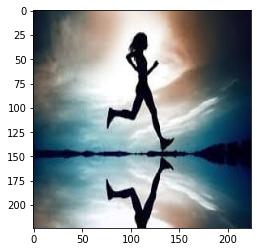

In [7]:
run_image = imread(train_run_path + '/run_59c4eb7c.jpg')
plt.imshow(run_image)

In [8]:
run_image.shape

(224, 224, 3)

In [12]:
dim1 = []
dim2 = []

for image_filename in os.listdir(train_run_path):
    image = imread(train_run_path + '/' + image_filename)
    d1,d2,color = image.shape
    dim1.append(d1)
    dim2.append(d2)

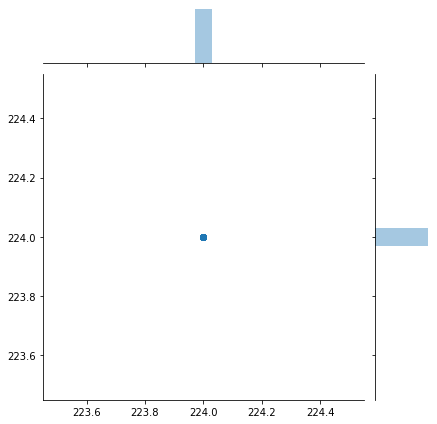

In [13]:
sns.jointplot(dim1, dim2)

In [14]:
np.mean(dim1)

224.0

In [15]:
np.mean(dim2)

224.0

In [21]:
image_shape = (224, 224, 3)

## Preprocessing

In [17]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [18]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [28]:
batch_size = 16

In [32]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                              target_size=image_shape[:2], 
                              color_mode='rgb', 
                              batch_size=batch_size, 
                              class_mode='binary')

Found 600 images belonging to 2 classes.


In [33]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                              target_size=image_shape[:2], 
                              color_mode='rgb', 
                              batch_size=batch_size, 
                              class_mode='binary', 
                              shuffle=False)

Found 121 images belonging to 2 classes.


## Create Model

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23888000  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [35]:
model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 38 steps, validate for 8 steps
Epoch 1/20
38/38 [==============================] - 45s 1s/step - loss: 0.6792 - accuracy: 0.6233 - val_loss: 0.6409 - val_accuracy: 0.6033
Epoch 2/20
38/38 [==============================] - 48s 1s/step - loss: 0.6952 - accuracy: 0.5900 - val_loss: 0.6548 - val_accuracy: 0.5372
Epoch 3/20
38/38 [==============================] - 54s 1s/step - loss: 0.6835 - accuracy: 0.5450 - val_loss: 0.6398 - val_accuracy: 0.5372
Epoch 4/20
38/38 [==============================] - 53s 1s/step - loss: 0.6848 - accuracy: 0.5800 - val_loss: 0.6468 - val_accuracy: 0.6529
Epoch 5/20
38/38 [==============================] - 67s 2s/step - loss: 0.6541 - accuracy: 0.6167 - val_loss: 0.6455 - val_accuracy: 0.6198
Epoch 6/20
38/38 [==============================] - 66s 2s/step - loss: 0.6528 - accuracy: 0.6450 - val_loss: 0.6300 - val_accuracy: 0.6529
Epoch 7/20
38/38 [==============================] - 70s 2s/step - los

In [37]:
model.evaluate(test_image_gen)

  ...
    to  
  ['...']
8/8 [==============================] - 3s 424ms/step - loss: 0.6583 - accuracy: 0.6446


[0.6583184786140919, 0.6446281]

In [38]:
model.metrics_names

['loss', 'accuracy']